In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
import xlrd
import time

In [25]:
start_time = time.time()

df_full = pd.read_csv('../../Data/yellow_tripdata_2009-01.csv')

print("--- %s seconds ---" % (time.time() - start_time))

--- 38.38486433029175 seconds ---


In [8]:
map = gpd.read_file('../../Data/NYC_Geo_prayer.json')

In [34]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14092413 entries, 0 to 14092412
Data columns (total 18 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   vendor_name            object 
 1   Trip_Pickup_DateTime   object 
 2   Trip_Dropoff_DateTime  object 
 3   Passenger_Count        int64  
 4   Trip_Distance          float64
 5   Start_Lon              float64
 6   Start_Lat              float64
 7   Rate_Code              float64
 8   store_and_forward      float64
 9   End_Lon                float64
 10  End_Lat                float64
 11  Payment_Type           object 
 12  Fare_Amt               float64
 13  surcharge              float64
 14  mta_tax                float64
 15  Tip_Amt                float64
 16  Tolls_Amt              float64
 17  Total_Amt              float64
dtypes: float64(13), int64(1), object(4)
memory usage: 1.9+ GB


In [35]:
df3=df_full.head(10000)

In [36]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   vendor_name            10000 non-null  object 
 1   Trip_Pickup_DateTime   10000 non-null  object 
 2   Trip_Dropoff_DateTime  10000 non-null  object 
 3   Passenger_Count        10000 non-null  int64  
 4   Trip_Distance          10000 non-null  float64
 5   Start_Lon              10000 non-null  float64
 6   Start_Lat              10000 non-null  float64
 7   Rate_Code              0 non-null      float64
 8   store_and_forward      0 non-null      float64
 9   End_Lon                10000 non-null  float64
 10  End_Lat                10000 non-null  float64
 11  Payment_Type           10000 non-null  object 
 12  Fare_Amt               10000 non-null  float64
 13  surcharge              10000 non-null  float64
 14  mta_tax                0 non-null      float64
 15  Tip

In [39]:
df3.iloc[:,5]

0      -73.991957
1      -73.982102
2      -74.002587
3      -73.974267
4      -74.001580
          ...    
9995   -73.997167
9996   -73.962212
9997   -73.873022
9998   -73.984955
9999   -73.982615
Name: Start_Lon, Length: 10000, dtype: float64

In [4]:
df2['Start_Lat'].value_counts()

0.000000     213319
41.366138     23723
40.733697      1978
40.758087      1476
40.774093      1375
              ...  
40.577090         1
41.116347         1
40.655097         1
40.660988         1
40.851998         1
Name: Start_Lat, Length: 203980, dtype: int64

In [5]:
df2['Start_Lon'].value_counts()

 0.000000     213326
-73.137393     23723
-73.982250      1987
-73.951818      1918
-73.982060      1854
               ...  
-73.852428         1
-74.021070         1
-73.880159         1
-73.835335         1
-74.171460         1
Name: Start_Lon, Length: 201098, dtype: int64

In [9]:
print(map.crs)

epsg:4326


<AxesSubplot:>

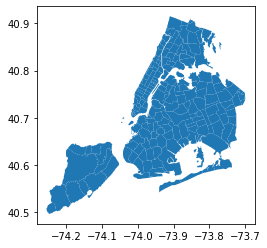

In [10]:
map.plot()

In [8]:
type(map)

geopandas.geodataframe.GeoDataFrame

In [17]:
print(df2.shape)

(14092413, 19)


In [18]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14092413 entries, 0 to 14092412
Data columns (total 19 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   vendor_name            object 
 1   Trip_Pickup_DateTime   object 
 2   Trip_Dropoff_DateTime  object 
 3   Passenger_Count        int64  
 4   Trip_Distance          float64
 5   Start_Lon              float64
 6   Start_Lat              float64
 7   Rate_Code              float64
 8   store_and_forward      float64
 9   End_Lon                float64
 10  End_Lat                float64
 11  Payment_Type           object 
 12  Fare_Amt               float64
 13  surcharge              float64
 14  mta_tax                float64
 15  Tip_Amt                float64
 16  Tolls_Amt              float64
 17  Total_Amt              float64
 18  geometry               object 
dtypes: float64(13), int64(1), object(5)
memory usage: 2.0+ GB


In [33]:
start_time = time.time()

df3['geometry'] = df3.apply(lambda x: Point((float(x.Start_Lon), 
                                             float(x.Start_Lat))), 
                                             axis=1)
df3.head(3)

print("--- %s seconds ---" % (time.time() - start_time))

--- 0.7306637763977051 seconds ---


In [49]:
df2=df2[['Trip_Distance','Fare_Amt','geometry']]

In [14]:
map.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [50]:
df2

,Trip_Distance,Fare_Amt,geometry
0,2.63,8.9,POINT (-73.991957 40.721567)
1,4.55,12.1,POINT (-73.982102 40.73629)
2,10.35,23.7,POINT (-74.00258700000001 40.739748)
3,5.00,14.9,POINT (-73.974267 40.790955)
4,0.40,3.7,POINT (-74.00158 40.719382)
...,...,...,...
14092408,0.89,6.5,POINT (-73.98201299999998 40.74333)
14092409,1.94,8.1,POINT (-73.97278799999998 40.761988)
14092410,3.80,14.5,POINT (-73.977467 40.751861)
14092411,3.85,10.9,POINT (-73.981295 40.753)


In [51]:
df2=gpd.GeoDataFrame(df2,
                     crs=map.crs,
                     geometry=df2['geometry'])

In [52]:
df2

,Trip_Distance,Fare_Amt,geometry
0,2.63,8.9,POINT (-73.99196 40.72157)
1,4.55,12.1,POINT (-73.98210 40.73629)
2,10.35,23.7,POINT (-74.00259 40.73975)
3,5.00,14.9,POINT (-73.97427 40.79095)
4,0.40,3.7,POINT (-74.00158 40.71938)
...,...,...,...
14092408,0.89,6.5,POINT (-73.98201 40.74333)
14092409,1.94,8.1,POINT (-73.97279 40.76199)
14092410,3.80,14.5,POINT (-73.97747 40.75186)
14092411,3.85,10.9,POINT (-73.98130 40.75300)


In [22]:
df2.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [53]:
df2.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 14092413 entries, 0 to 14092412
Data columns (total 3 columns):
 #   Column         Dtype   
---  ------         -----   
 0   Trip_Distance  float64 
 1   Fare_Amt       float64 
 2   geometry       geometry
dtypes: float64(2), geometry(1)
memory usage: 322.5 MB


In [54]:
start_time = time.time()

geo_processing = gpd.sjoin(df2, map, op = 'within')

print("--- %s seconds ---" % (time.time() - start_time))

--- 1279.3593051433563 seconds ---


In [57]:
geo_processing

,Trip_Distance,Fare_Amt,geometry,index_right,OBJECTID,postalCode,PO_NAME,STATE,borough,ST_FIPS,CTY_FIPS,BLDGpostal,@id,longitude,latitude
0,2.63,8.9,POINT (-73.99196 40.72157),123,124,10002,New York,NY,Manhattan,36,061,0,http://nyc.pediacities.com/Resource/PostalCode...,-73.985688,40.716161
54,1.90,7.8,POINT (-73.98855 40.72156),123,124,10002,New York,NY,Manhattan,36,061,0,http://nyc.pediacities.com/Resource/PostalCode...,-73.985688,40.716161
240,1.20,6.5,POINT (-73.99101 40.71946),123,124,10002,New York,NY,Manhattan,36,061,0,http://nyc.pediacities.com/Resource/PostalCode...,-73.985688,40.716161
311,2.50,9.3,POINT (-73.98899 40.71681),123,124,10002,New York,NY,Manhattan,36,061,0,http://nyc.pediacities.com/Resource/PostalCode...,-73.985688,40.716161
357,1.60,7.8,POINT (-73.98884 40.72226),123,124,10002,New York,NY,Manhattan,36,061,0,http://nyc.pediacities.com/Resource/PostalCode...,-73.985688,40.716161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8330728,0.63,4.1,POINT (-73.77414 40.79205),84,85,11359,Bayside,NY,Queens,36,081,0,http://nyc.pediacities.com/Resource/PostalCode...,-73.776720,40.791742
10958816,1.06,4.9,POINT (-73.77562 40.79445),84,85,11359,Bayside,NY,Queens,36,081,0,http://nyc.pediacities.com/Resource/PostalCode...,-73.776720,40.791742
11406897,1.73,6.5,POINT (-73.77922 40.79196),84,85,11359,Bayside,NY,Queens,36,081,0,http://nyc.pediacities.com/Resource/PostalCode...,-73.776720,40.791742
12294968,4.73,12.9,POINT (-73.77617 40.79332),84,85,11359,Bayside,NY,Queens,36,081,0,http://nyc.pediacities.com/Resource/PostalCode...,-73.776720,40.791742


In [29]:
df2['geometry'].value_counts()

AttributeError: 'GeometryArray' object has no attribute 'value_counts'

In [35]:
df2

,vendor_name,Trip_Pickup_DateTime,Trip_Dropoff_DateTime,Passenger_Count,Trip_Distance,Start_Lon,Start_Lat,Rate_Code,store_and_forward,End_Lon,End_Lat,Payment_Type,Fare_Amt,surcharge,mta_tax,Tip_Amt,Tolls_Amt,Total_Amt
0,VTS,2009-01-04 02:52:00,2009-01-04 03:02:00,1,2.63,-73.991957,40.721567,NaN,NaN,-73.993803,40.695922,CASH,8.9,0.5,NaN,0.00,0.00,9.40
1,VTS,2009-01-04 03:31:00,2009-01-04 03:38:00,3,4.55,-73.982102,40.736290,NaN,NaN,-73.955850,40.768030,Credit,12.1,0.5,NaN,2.00,0.00,14.60
2,VTS,2009-01-03 15:43:00,2009-01-03 15:57:00,5,10.35,-74.002587,40.739748,NaN,NaN,-73.869983,40.770225,Credit,23.7,0.0,NaN,4.74,0.00,28.44
3,DDS,2009-01-01 20:52:58,2009-01-01 21:14:00,1,5.00,-73.974267,40.790955,NaN,NaN,-73.996558,40.731849,CREDIT,14.9,0.5,NaN,3.05,0.00,18.45
4,DDS,2009-01-24 16:18:23,2009-01-24 16:24:56,1,0.40,-74.001580,40.719382,NaN,NaN,-74.008378,40.720350,CASH,3.7,0.0,NaN,0.00,0.00,3.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,VTS,2009-01-03 21:33:00,2009-01-03 21:39:00,1,1.10,-73.997167,40.737425,NaN,NaN,-73.990877,40.749973,CASH,5.3,0.5,NaN,0.00,0.00,5.80
9996,VTS,2009-01-03 19:04:00,2009-01-03 19:19:00,5,2.64,-73.962212,40.779117,NaN,NaN,-73.989327,40.756197,CASH,10.1,0.0,NaN,0.00,0.00,10.10
9997,VTS,2009-01-03 09:54:00,2009-01-03 10:17:00,2,9.06,-73.873022,40.774053,NaN,NaN,-73.971993,40.796870,CASH,24.1,0.0,NaN,0.00,4.15,28.25
9998,VTS,2009-01-07 19:56:00,2009-01-07 20:04:00,1,3.02,-73.984955,40.756653,NaN,NaN,-73.997372,40.721703,Credit,11.3,1.0,NaN,2.00,0.00,14.30


<AxesSubplot:>

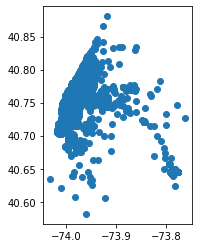

In [41]:
geo_processing.plot()

<AxesSubplot:>

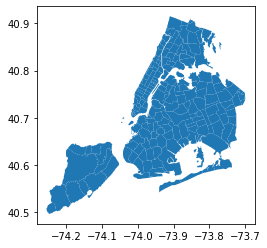

In [43]:
map.plot()

In [ ]:
start_time = time.time()

please_god_work.to_csv('../../Data/yellow_tripdata_2009-01_GEO_PROCESSED.csv')

print("--- %s seconds ---" % (time.time() - start_time))

In [61]:
del data

NameError: name 'data' is not defined